In [1]:
from DataSet import DataSet

Loading ml-1m data set...
Loading Success!
Data Info:
	User Num: 6040
	Item Num: 3952
	Data Size: 1000209


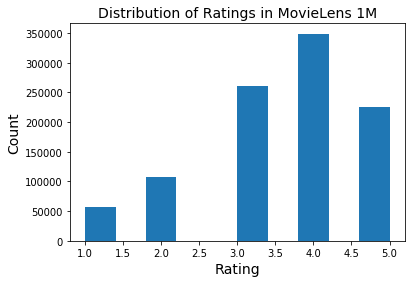

In [2]:
filepath = './Data/ml-1m/ratings.dat'
a = DataSet(filepath)

In [3]:
a.shape[0]

6040

In [4]:
import numpy as np
import pandas as pd


In [5]:
df = pd.DataFrame(a.data, columns=['user', 'item', 'ratings', 'time'])
df = df.drop(columns=['time'])

NameError: name 'a' is not defined

In [6]:
filename = './Data/ml-1m/u.data'
name = ['user', 'item', 'ratings', 'time']
df1 = pd.read_csv(filename, sep='\t', names = name)
df1 = df1.drop(columns=['time'])

In [7]:
data_dim = len(df1.user.unique()), len(df1.item.unique())

In [8]:
data_dim[0]

943

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
data = np.array(df1)
train, test = train_test_split(data, test_size=0.2)

In [11]:
u_train = train[:,0]
i_train = train[:,1]
r_train = train[:,2]
u_test = test[:,0]
i_test = test[:,1]
r_test = test[:,2]

In [6]:
shuffled_ratings = df.sample(frac = 1.)
Users = shuffled_ratings['user'].values
print ('Users:', Users, ', shape =', Users.shape)
Movies = shuffled_ratings['item'].values
print ('Movies:', Movies, ', shape =', Movies.shape)
Ratings = shuffled_ratings['ratings'].values
print ('Ratings:', Ratings, ', shape =', Ratings.shape)

Users: [3646 5656 4051 ... 3453  662  659] , shape = (1000209,)
Movies: [2985  213 2797 ... 1294  410 2145] , shape = (1000209,)
Ratings: [4. 5. 2. ... 4. 4. 3.] , shape = (1000209,)


In [12]:
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.layers import dot, concatenate, Embedding, Input, Flatten, Dropout, Dense,Conv1D
from keras.models import Sequential
from keras import optimizers

In [13]:
len_dim_i = [64,128,128,256,512]
len_dim_u = [64,128,128,256,512]
len_dim_r = [600,300,150]

In [14]:
user_id_input = Input(shape=[1], name='user')
item_id_input = Input(shape=[1], name='item')

user_embedding = Embedding(output_dim=10, input_dim=data_dim[0] + 1,
                                   input_length=1, name='user_embedding')(user_id_input)
item_embedding = Embedding(output_dim=10, input_dim=data_dim[1] + 1,
                                   input_length=1, name='item_embedding')(item_id_input)

# user_embedding = (Dense(10))(user_embedding)
# item_embedding = (Dense(10))(item_embedding)

# reshape from shape: (batch_size, input_length, embedding_size)
# to shape: (batch_size, input_length * embedding_size) which is
# equal to shape: (batch_size, embedding_size)
    

user_vecs = Flatten()(user_embedding)
item_vecs = Flatten()(item_embedding)

    
# y = merge([user_vecs, item_vecs], mode='dot', output_shape=(1,))
y = concatenate([user_vecs, item_vecs])
for i in range(len(len_dim_r)):
    y = (Dense(len_dim_r[i]))(y)
#     y = (Dropout(0.25))(y)
# y = Dense(1, activation="relu")(y)
# M = Sequential()
# M.add(y)
# y = (Dropout(0.4))(y)
y = (Dense(64))(y)
# y = (Dropout(0.2))(y)
# y = (Dense(32))(y)
# y = (Dropout(0.2))(y)
# y = (Dense(16))(y)
# y = (Dropout(0.2))(y)
y = (Dense(4))(y)
y = (Dense(1, activation='relu'))(y)

model = Model(inputs=[user_id_input, item_id_input], outputs=[y])
adam = optimizers.Adam(lr=0.001)
model.compile(optimizer=adam, loss='mae',metrics=['accuracy'])

In [15]:
history = model.fit([u_train,i_train], r_train,validation_data=([u_test,i_test], r_test), batch_size=64, epochs = 10, verbose=1)

Train on 80000 samples, validate on 20000 samples
Epoch 1/10
80000/80000 [==============================] - 10s 127us/step - loss: 0.8149 - acc: 0.3882 - val_loss: 0.7579 - val_acc: 0.4102
Epoch 2/10
80000/80000 [==============================] - 10s 120us/step - loss: 0.7527 - acc: 0.4161 - val_loss: 0.7507 - val_acc: 0.4101
Epoch 3/10
80000/80000 [==============================] - 10s 121us/step - loss: 0.7420 - acc: 0.4245 - val_loss: 0.7456 - val_acc: 0.4150
Epoch 4/10
80000/80000 [==============================] - 10s 123us/step - loss: 0.7380 - acc: 0.4275 - val_loss: 0.7508 - val_acc: 0.4125
Epoch 5/10
80000/80000 [==============================] - 10s 127us/step - loss: 0.7340 - acc: 0.4301 - val_loss: 0.7455 - val_acc: 0.4247
Epoch 6/10
80000/80000 [==============================] - 10s 131us/step - loss: 0.7322 - acc: 0.4328 - val_loss: 0.7567 - val_acc: 0.4025
Epoch 7/10
80000/80000 [==============================] - 10s 130us/step - loss: 0.7296 - acc: 0.4332 - val_loss: 0.

In [16]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 10)        9440        user[0][0]                       
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 10)        16830       item[0][0]                       
__________________________________________________________________________________________________
flatten_5 

In [25]:
model.save('train_100k.h5')

In [2]:
history = load_model('train_100k.h5')

In [11]:
# print(history)

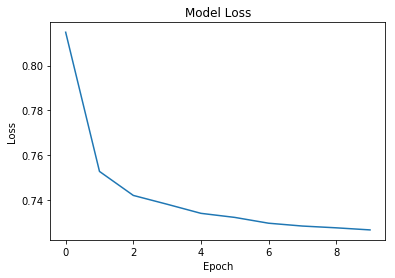

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

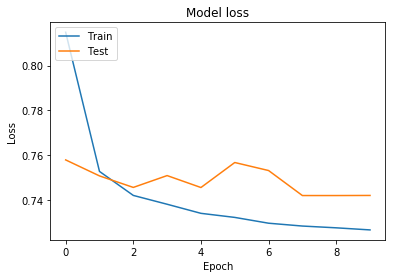

In [17]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [1]:
from keras.models import load_model

Using TensorFlow backend.


In [18]:
filepath = '/home/hau/Recommendation/DMF/Data/ml-1m/u1.test'
df = pd.read_csv(filepath, sep = '\t', names = ['user', 'item', 'rating', 'time'])
df = df.drop(columns=['time'])
data = np.array(df)

In [19]:
pre = model.predict([data[:,0], data[:,1]])

In [20]:
re = np.concatenate((data, pre), axis=1)

In [21]:
def get_user(input_user, matrix):
    user_id = []
    for i in range(len(matrix)):
        if matrix[i][0] == input_user:
            user_id.append(matrix[i])
    user_id = np.array(user_id).reshape(-1,3)
    return user_id

In [22]:
def pre_dict(input_matrix):
    model = load_model('/home/hau/Recommendation/DMF/train_100k.h5')
    pre = model.predict([input_matrix[:,0], input_matrix[:,1]])
    input_matrix = np.concatenate((input_matrix,pre), axis=1)
    return input_matrix

In [23]:
pre_dict(input_matrix=get_user(1,data))[:10]

array([[ 1.        ,  6.        ,  5.        ,  3.72561979],
       [ 1.        , 10.        ,  3.        ,  4.13882399],
       [ 1.        , 12.        ,  5.        ,  4.66038895],
       [ 1.        , 14.        ,  5.        ,  4.11883068],
       [ 1.        , 17.        ,  3.        ,  3.29185867],
       [ 1.        , 20.        ,  4.        ,  3.72898817],
       [ 1.        , 23.        ,  4.        ,  4.3413887 ],
       [ 1.        , 24.        ,  3.        ,  3.74914432],
       [ 1.        , 27.        ,  2.        ,  3.3182466 ],
       [ 1.        , 31.        ,  3.        ,  3.71826053]])

In [28]:
for i in range(10):
    print(model.predict([[data[i][0]],[data[i][1]]]))

[[3.7256198]]
[[4.1388235]]
[[4.660389]]
[[4.118831]]
[[3.2918587]]
[[3.7289884]]
[[4.3413897]]
[[3.7491443]]
[[3.3182466]]
[[3.7182605]]


In [13]:
# history.history['acc']

In [14]:
# user_id_input = Input(shape=[1], name='user')
# item_id_input = Input(shape=[1], name='item')

# user_embedding = Embedding(output_dim=100, input_dim=a.shape[0] + 1,
#                                    input_length=1, name='user_embedding')(user_id_input)
# item_embedding = Embedding(output_dim=100, input_dim=a.shape[1] + 1,
#                                    input_length=1, name='item_embedding')(item_id_input)

# # reshape from shape: (batch_size, input_length, embedding_size)
# # to shape: (batch_size, input_length * embedding_size) which is
# # equal to shape: (batch_size, embedding_size)
# user_vecs = Flatten()(user_embedding)
# item_vecs = Flatten()(item_embedding)

#         # y = merge([user_vecs, item_vecs], mode='dot', output_shape=(1,))
# y = dot([user_vecs, item_vecs], axes=1)

# y = Dense

# model = Model(inputs=[user_id_input, item_id_input], outputs=[y])
# model.compile(optimizer='adam', loss='mae',metrics=['accuracy'])

In [15]:
# history = model.fit([Users,Movies], Ratings, batch_size=32, epochs = 5, verbose=1)

In [12]:
def F_20(data_dim, dim_r_new):
    user_id_input = Input(shape=[1], name='user')
    item_id_input = Input(shape=[1], name='item')

    user_embedding = Embedding(output_dim=20, input_dim=data_dim[0] + 1,
                                   input_length=1, name='user_embedding')(user_id_input)
    item_embedding = Embedding(output_dim=20, input_dim=data_dim[1] + 1,
                                   input_length=1, name='item_embedding')(item_id_input)

    user_vecs = (Dense(20))(user_embedding)
    item_vecs = (Dense(20))(item_embedding)
    for i in range(len(dim_u_new)):
        user_vecs = (Dense(dim_u_new[i]))(user_vecs)
        user_vecs = (Dropout(0.25))(user_vecs)
    for i in range(len(dim_i_new)):
        item_vecs = (Dense(dim_i_new[i]))(item_vecs)
        item_vecs = (Dropout(0.25))(item_vecs)

    # reshape from shape: (batch_size, input_length, embedding_size)
    # to shape: (batch_size, input_length * embedding_size) which is
    # equal to shape: (batch_size, embedding_size)
    

    user_vecs = Flatten()(user_embedding)
    item_vecs = Flatten()(item_embedding)

    
    # y = merge([user_vecs, item_vecs], mode='dot', output_shape=(1,))
    y = dot([user_vecs, item_vecs], axes=1)
    for i in range(len(dim_r_new)):
        y = (Dense(dim_r_new[i]))(y)
        y = (Dropout(0.25))(y)
    # y = Dense(1, activation="relu")(y)
    # M = Sequential()
    # M.add(y)
    y = (Dropout(0.4))(y)
    y = (Dense(64))(y)
    # y = (Dropout(0.2))(y)
    y = (Dense(32))(y)
    # y = (Dropout(0.2))(y)
    # y = (Dense(16))(y)
    # y = (Dropout(0.2))(y)
    y = (Dense(4))(y)
    y = (Dense(1, activation='relu'))(y)

    model = Model(inputs=[user_id_input, item_id_input], outputs=[y])
    adam = optimizers.Adam(lr=0.001)
    model.compile(optimizer=adam, loss='mae',metrics=['accuracy', 'mae'])
    return model

In [13]:
dim_u_new = [16,16,32]
dim_i_new = [16,16,32,32]
dim_r_new = [512,256,128,128]
new_m = F_20(data_dim, dim_r_new)

In [67]:
his = new_m.fit([u_train,i_train], r_train,validation_data=([u_test,i_test], r_test), batch_size=64, epochs = 5, verbose=1)

Train on 80000 samples, validate on 20000 samples
Epoch 1/5
80000/80000 [==============================] - 15s 188us/step - loss: 0.9457 - acc: 0.3269 - mean_absolute_error: 0.9457 - val_loss: 0.8164 - val_acc: 0.3856 - val_mean_absolute_error: 0.8164
Epoch 2/5
80000/80000 [==============================] - 12s 149us/step - loss: 0.7400 - acc: 0.4316 - mean_absolute_error: 0.7400 - val_loss: 0.7953 - val_acc: 0.3805 - val_mean_absolute_error: 0.7953
Epoch 3/5
80000/80000 [==============================] - 13s 166us/step - loss: 0.6640 - acc: 0.4827 - mean_absolute_error: 0.6640 - val_loss: 0.7792 - val_acc: 0.3995 - val_mean_absolute_error: 0.7792
Epoch 4/5
80000/80000 [==============================] - 13s 162us/step - loss: 0.6210 - acc: 0.5188 - mean_absolute_error: 0.6210 - val_loss: 0.8210 - val_acc: 0.3817 - val_mean_absolute_error: 0.8210
Epoch 5/5
80000/80000 [==============================] - 12s 151us/step - loss: 0.5949 - acc: 0.5397 - mean_absolute_error: 0.5949 - val_loss:

In [14]:
new_m.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 20)        18880       user[0][0]                       
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 20)        33660       item[0][0]                       
__________________________________________________________________________________________________
flatten_1 

In [15]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot